In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
gg_data = pd.read_csv('adata_24dec.csv')

In [3]:
gg_data.head()

,user_id,account_status,friend_id,name,account_status.1
0,12,active,13,Ekaparnika Abbott,ghost
1,12,active,14,Ekaparnika Abbott,ghost
2,12,active,15,Bala Nair,ghost
3,12,active,16,Bala Nair,ghost
4,12,active,17,Bala Nair,ghost


In [4]:
gg_data.nunique()

user_id               201
account_status          1
friend_id           94165
name                85588
account_status.1        2
dtype: int64

In [5]:
gg_data.account_status.value_counts()

active    99290
Name: account_status, dtype: int64

In [6]:
gg_data.loc[gg_data['account_status'] == 'active'];

In [7]:
mydict = {}
for index, row in gg_data.iterrows():
    try:
        val = mydict[row['friend_id']]
        val.append(row['user_id'])
        mydict.update({row['friend_id']:val})
    except KeyError:
        val = [row['user_id']]
        mydict.update({row['friend_id']:val})

In [8]:
hist_dict = {}
for key, value in mydict.iteritems():
    try:
        new_key = len(mydict[key])
        count   = hist_dict[new_key]
        count+=1
        hist_dict.update({new_key:count})
    except KeyError:
        new_key = len(mydict[key])
        hist_dict.update({new_key:1})

In [9]:
len(hist_dict)

17

In [13]:
hist_dict

{1: 91580,
 2: 1735,
 3: 236,
 4: 54,
 5: 338,
 6: 117,
 7: 43,
 8: 23,
 9: 13,
 10: 8,
 11: 2,
 12: 3,
 13: 7,
 14: 2,
 15: 1,
 16: 2,
 18: 1}

In [16]:
del hist_dict[2]

Text(0.5,0,'Number of Active Contacts')

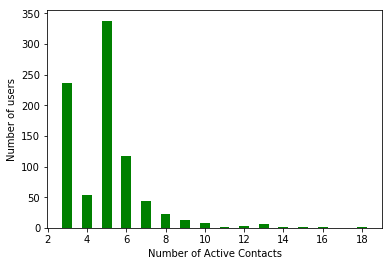

In [17]:
plt.bar(hist_dict.keys(), hist_dict.values(), 0.5, color='g', align='center')
plt.ylabel('Number of users')
plt.xlabel('Number of Active Contacts')